In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('medical_costs.csv')
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB
None


In [4]:
print(df.describe())

                Age          BMI      Children  Medical Cost
count  10000.000000  10000.00000  10000.000000  10000.000000
mean      41.678400     27.40301      2.501700  11898.932216
std       13.807724      7.22896      1.701672   6073.875834
min       18.000000     15.00000      0.000000   3617.090000
25%       30.000000     21.10000      1.000000   5909.925000
50%       42.000000     27.40000      2.000000   7957.430000
75%       54.000000     33.70000      4.000000  17931.962500
max       65.000000     40.00000      5.000000  20268.210000


In [5]:
print(df.isnull().sum())

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64


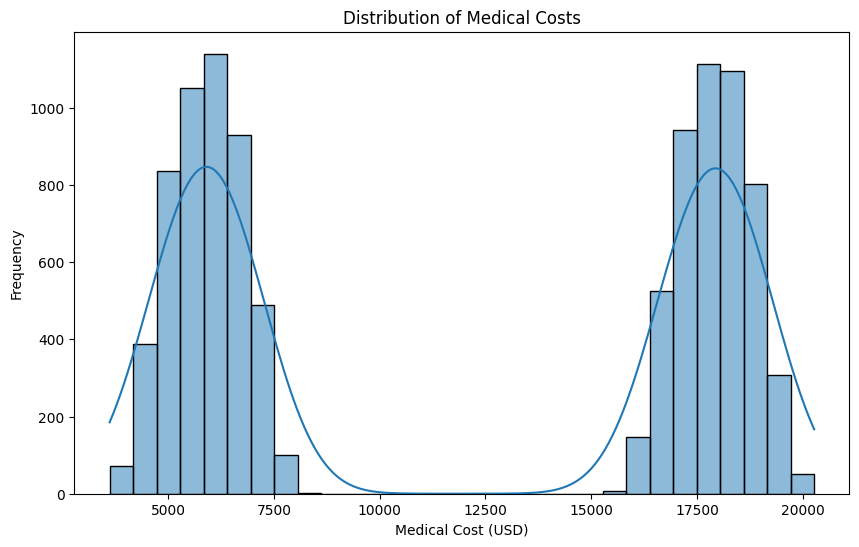

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Medical Cost'], bins=30, kde=True)
plt.title('Distribution of Medical Costs')
plt.xlabel('Medical Cost (USD)')
plt.ylabel('Frequency')
plt.show()

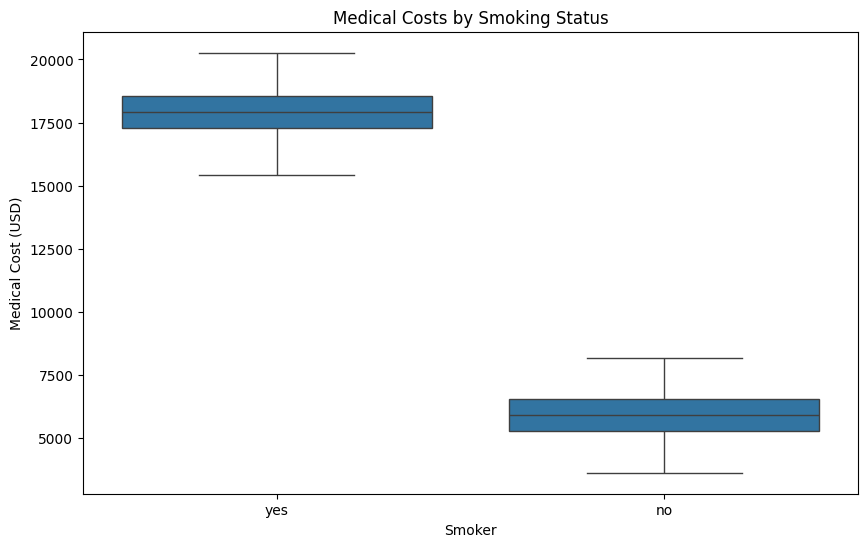

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoker', y='Medical Cost', data=df)
plt.title('Medical Costs by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Medical Cost (USD)')
plt.show()

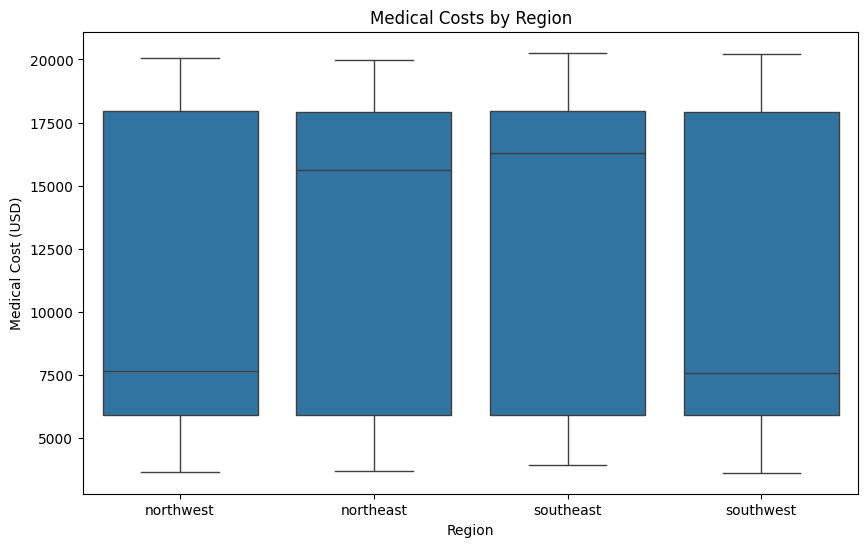

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Medical Cost', data=df)
plt.title('Medical Costs by Region')
plt.xlabel('Region')
plt.ylabel('Medical Cost (USD)')
plt.show()

In [9]:
df = pd.get_dummies(df, columns=['Sex', 'Smoker', 'Region'], drop_first=True)
df.head()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,58,15.6,2,17907.54,True,True,True,False,False
1,24,29.8,0,16312.64,True,True,False,False,False
2,50,29.0,5,6819.21,True,False,True,False,False
3,35,34.0,1,5247.87,True,False,False,True,False
4,31,17.6,3,17525.49,False,True,False,True,False


In [10]:
X = df.drop('Medical Cost', axis=1)
y = df['Medical Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Train MSE: 83769.12339571476
Test MSE: 84926.73518794552
Train R^2: 0.9977309008605584
Test R^2: 0.997689685176468


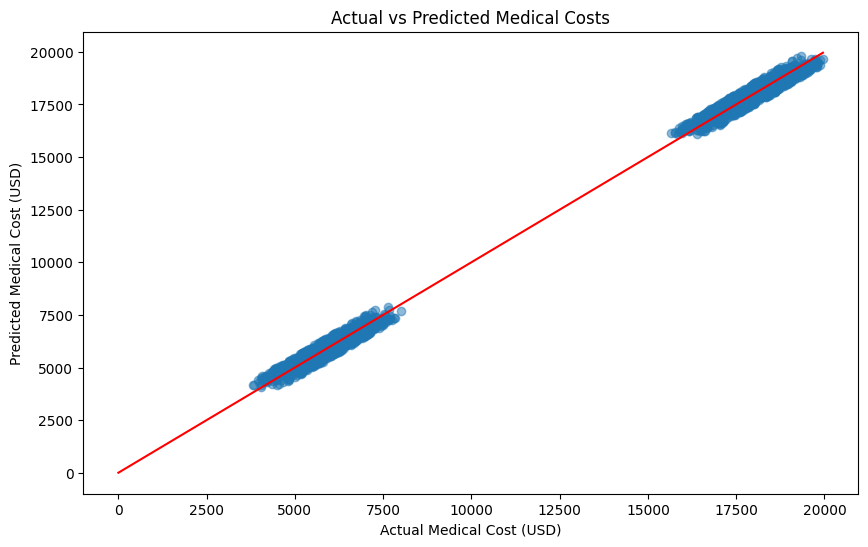

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.title('Actual vs Predicted Medical Costs')
plt.xlabel('Actual Medical Cost (USD)')
plt.ylabel('Predicted Medical Cost (USD)')
plt.show()